In [3]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("train (1).csv")
test_df = pd.read_csv("test (2).csv")

train_id = train_df["PassengerId"].values
test_id = test_df["PassengerId"].values

all_df = train_df.append(test_df).set_index('PassengerId')
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})

all_df["Age"].fillna(
    all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)
all_df["cabin_count"] = all_df["Cabin"].map(
         lambda x : len(x.split()) if type(x) == str else 0)
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs"
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))
all_df["social_status"].value_counts()
#all_df[all_df["Embarked"].isnull()]
all_df = all_df.drop([62,830])
train_id =np.delete(train_id, [62-1,830-1])
#all_df[all_df["Fare"].isnull()]
all_df.groupby(["Pclass","Sex"])["Fare"].mean()
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "99")
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]
y = all_df.loc[train_id, "Survived"].values
del all_df["Survived"]
X_df = pd.get_dummies(all_df)
X = X_df.values
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X= mm.fit_transform(X)


In [5]:
y.shape,X.shape


((889,), (1307, 27))

In [7]:
#홀드아웃메서드 사용 안하고 나누기
t_x=X[:len(train_id)] 
tt_x = X[len(train_id):]

<AxesSubplot:>

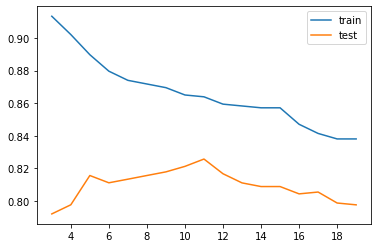

In [15]:
from sklearn.tree import DecisionTreeClassifier#의사결정트리사용
from sklearn.model_selection import cross_val_score#교차검증
from sklearn.metrics import accuracy_score #정확도
t_l = []
tt_l = []
for i in range(3,20):
    dt = DecisionTreeClassifier(min_samples_leaf=i)
    acc = cross_val_score(dt,t_x,y,scoring='accuracy',cv=5).mean() #cv는 쪼갬
    t_l.append(accuracy_score(dt.fit(t_x,y).predict(t_x),y))#두개의 y값이 얼마나 정확한지 정확도 계산
    tt_l.append(acc)
r = pd.DataFrame(t_l,index=range(3,20),columns=['train'])
r['test'] = tt_l
r.plot()

In [16]:
t_l

[0.9133858267716536,
 0.9021372328458943,
 0.889763779527559,
 0.8796400449943758,
 0.8740157480314961,
 0.8717660292463442,
 0.8695163104611924,
 0.8650168728908887,
 0.8638920134983127,
 0.859392575928009,
 0.8582677165354331,
 0.8571428571428571,
 0.8571428571428571,
 0.8470191226096738,
 0.8413948256467941,
 0.8380202474690663,
 0.8380202474690663]

In [17]:
tt_l

[0.7919570875388815,
 0.7975623690725576,
 0.815546245159652,
 0.8110709071288008,
 0.8132927061512094,
 0.815552593156859,
 0.8177870881736812,
 0.8211642226877419,
 0.8256649527074208,
 0.8166317526820288,
 0.811013775153939,
 0.8087665841427031,
 0.8087665841427031,
 0.8042722021202311,
 0.8053957976258491,
 0.7986542245921412,
 0.7975306290865232]